In [78]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal 
from mat4py import loadmat
from os import listdir
from os.path import isfile, join
myPath = "../data/"
#myPath = "C:\\Users\\Romain\\OneDrive\\Documents\\Cours\\Phelma\\3A SICOM\\Deuxieme_partie\\wind_turbine\\data"

files = [f for f in listdir(myPath) if isfile(join(myPath, f))]
files.pop(0)

'.DS_Store'

In [79]:
"""
keyword = 'lss'
loaded_data = []
for file in files:
    if keyword in file:
        print(file)
        loaded_data.append(loadmat(myPath+file))

data = []
fs = []
for i in range(len(loaded_data)):
    a = loaded_data[i]
    b = a[keyword]
    data.append(b["rawData"])
    fs.append(b["fs"])
#TODO generate time  axis from sampling time  
fr = np.zeros(len(data))
for i in range(len(data)):
    data[i] = data[i][100:-100]
    fr[i] = (np.mean(data[i]))/60

fo = np.dot(fr, 7.65)
fi = np.dot(fr, 10.35)
print(fr, '\n', fo, '\n', fi)
"""


'\nkeyword = \'lss\'\nloaded_data = []\nfor file in files:\n    if keyword in file:\n        print(file)\n        loaded_data.append(loadmat(myPath+file))\n\ndata = []\nfs = []\nfor i in range(len(loaded_data)):\n    a = loaded_data[i]\n    b = a[keyword]\n    data.append(b["rawData"])\n    fs.append(b["fs"])\n#TODO generate time  axis from sampling time  \nfr = np.zeros(len(data))\nfor i in range(len(data)):\n    data[i] = data[i][100:-100]\n    fr[i] = (np.mean(data[i]))/60\n\nfo = np.dot(fr, 7.65)\nfi = np.dot(fr, 10.35)\nprint(fr, \'\n\', fo, \'\n\', fi)\n'

2014-03-26-1730vib3.mat
2014-04-01-1059vib3.mat
2014-04-03-0737vib3.mat
2014-04-09-1620vib3.mat
2014-04-24-1349vib3.mat
2014-04-28-0759vib3.mat
Loaded and Data cropped


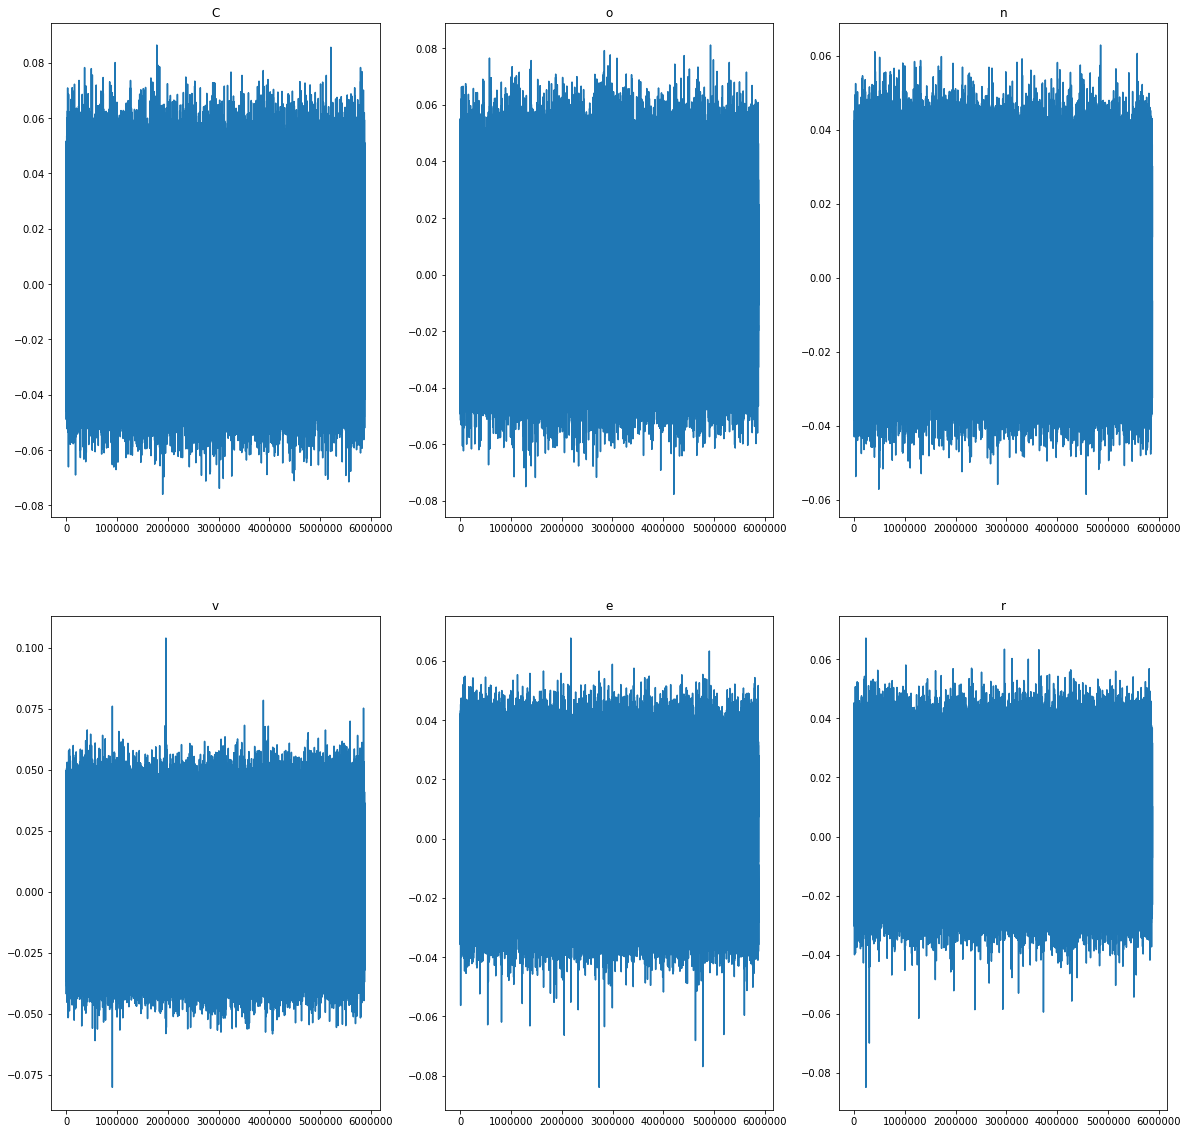

In [80]:
keywords  = ['hss', 'i1', 'i2', 'i3', 'lss', 'v1', 'v2', 'v3', 'vib1', 'vib2', 'vib3']
keyword = keywords[-1]
loaded_data = []
for file in files:
    if keyword in file:
        print(file)
        loaded_data.append(loadmat(myPath+file))

data = []
for i in range(len(loaded_data)):
    a = loaded_data[i]
    b = a[keyword]
    data.append(b["rawData"])
    fs = b["fs"]
#TODO generate time  axis from sampling time  

for i in range(len(data)):
    data[i] = data[i][100:-100]
print("Loaded and Data cropped")

plt.figure(figsize = (20,20))
for i in range(len(data)):        
    plt.subplot(231+i)
    plt.plot(data[i])
    plt.title(file[i])

c:\users\romain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


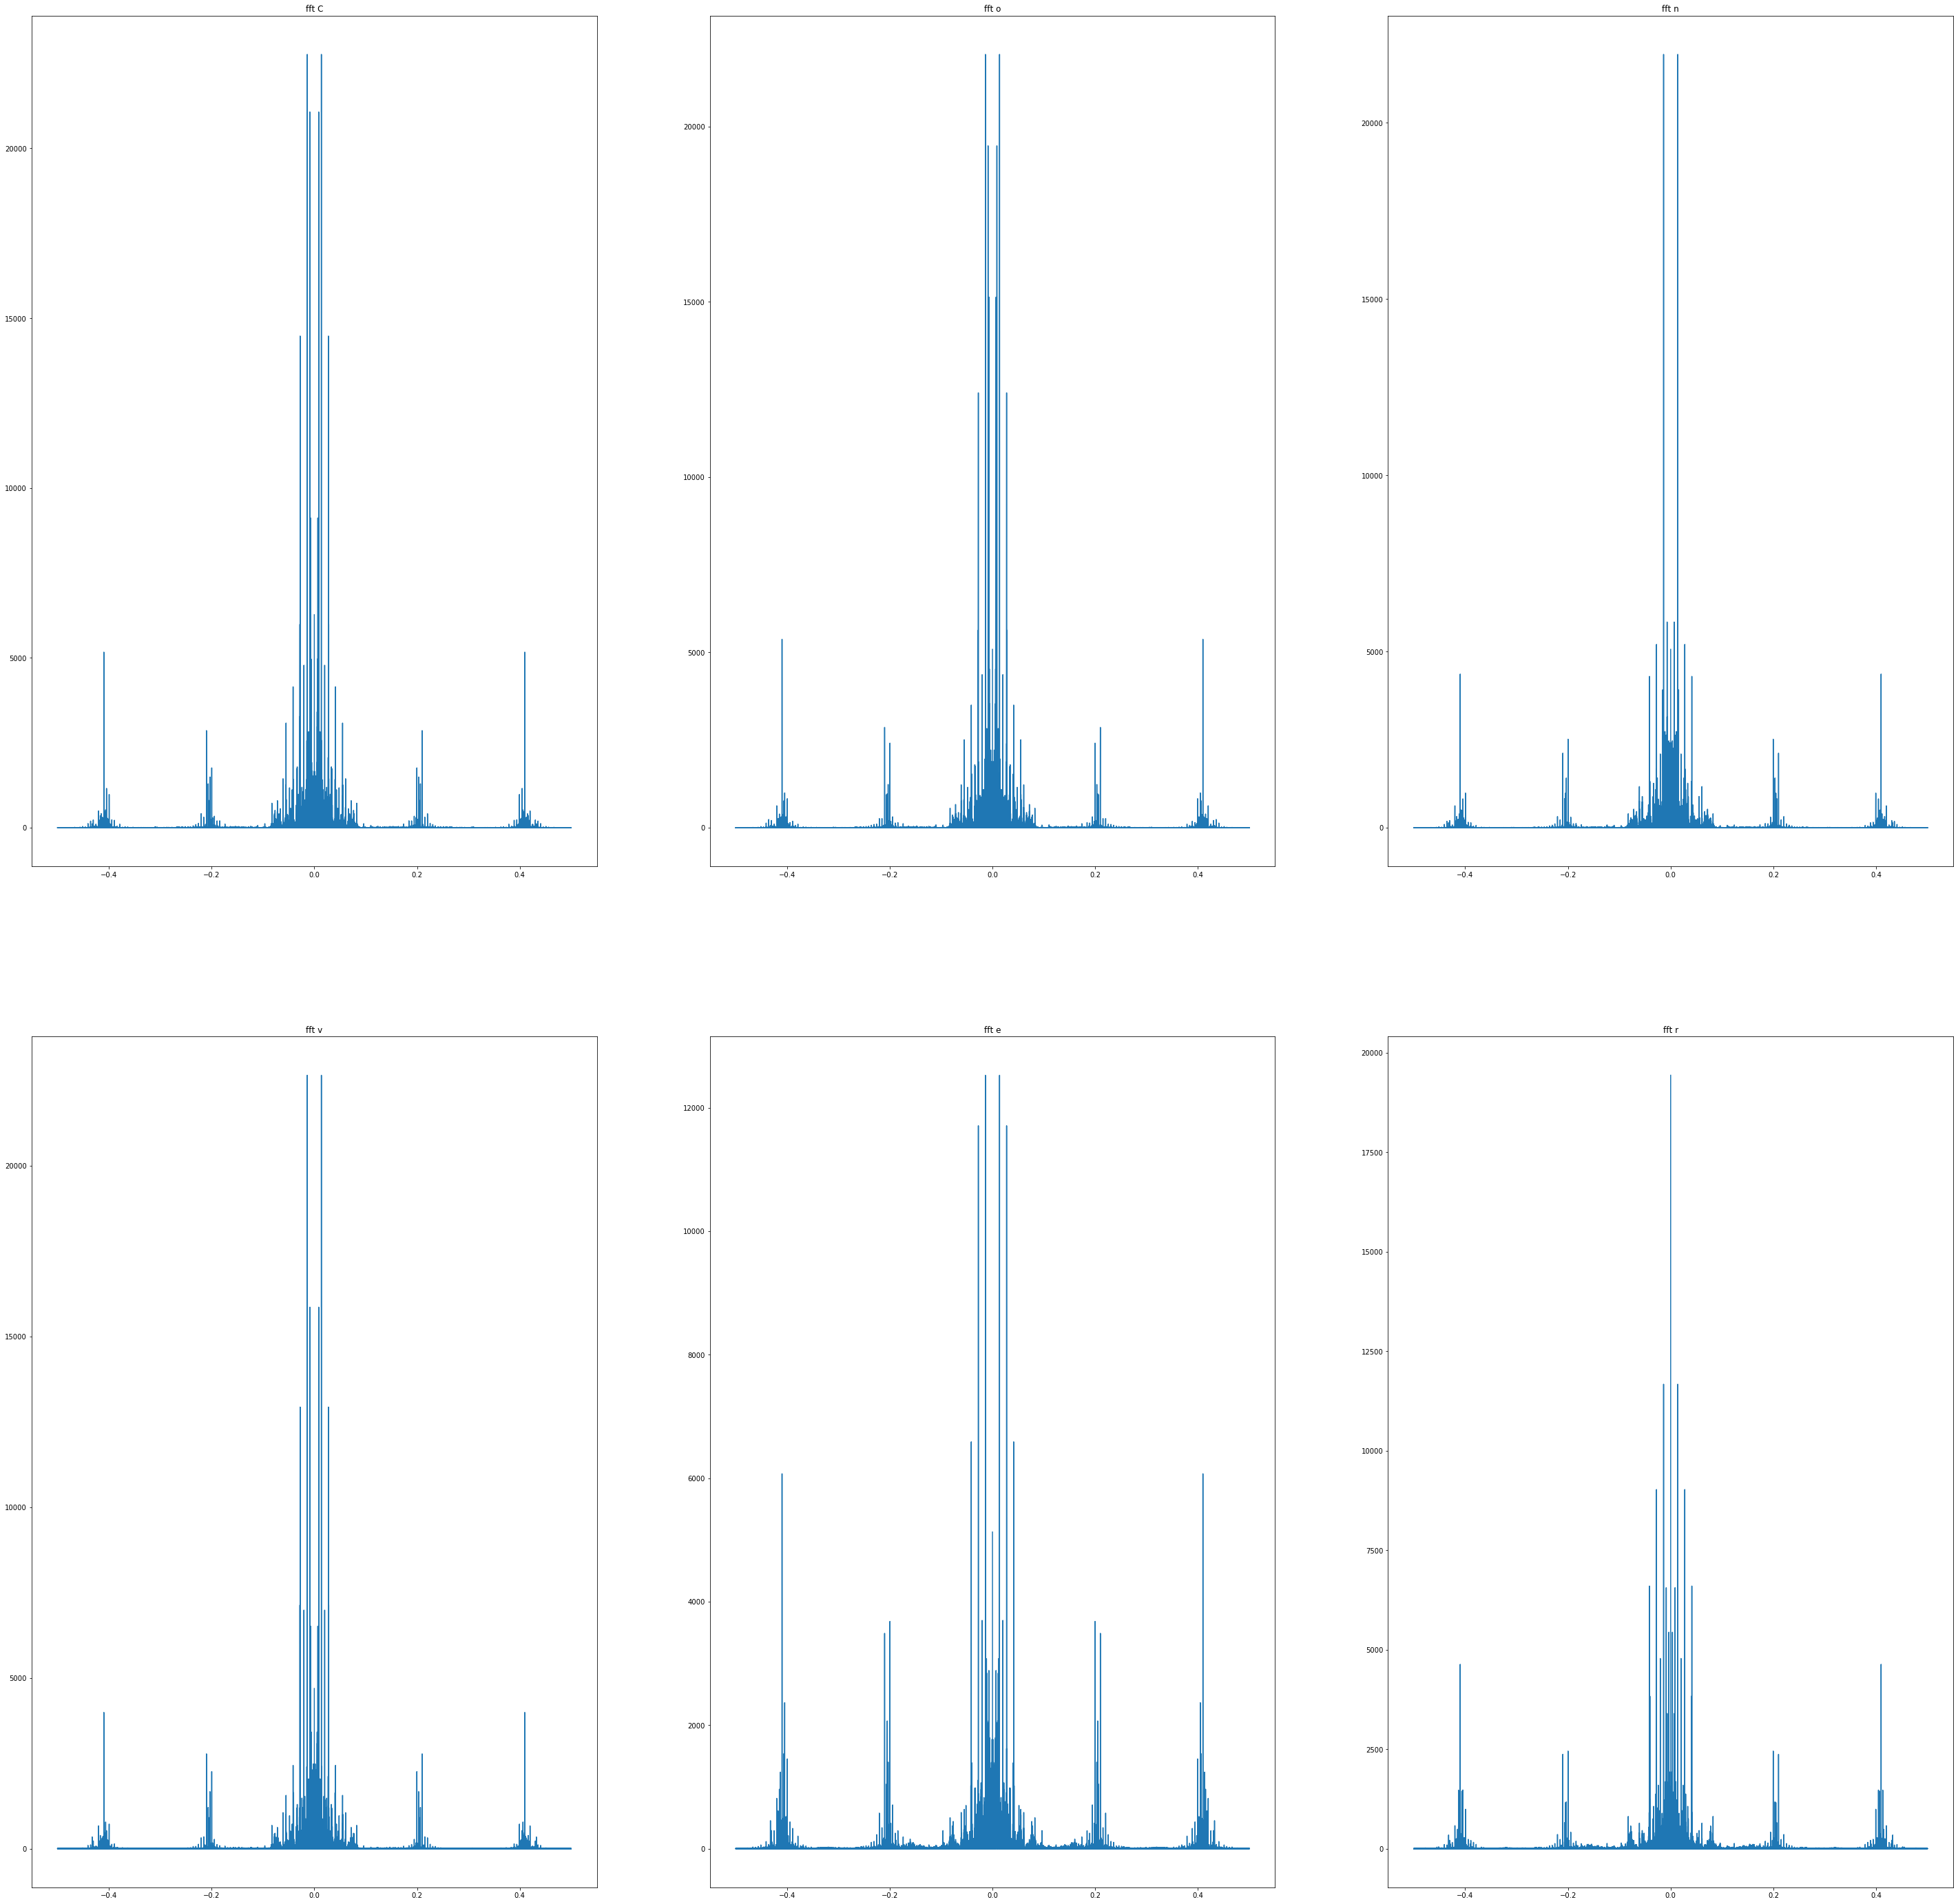

In [81]:
plt.figure(2, figsize = (50,50))
for i in range(len(data)): 
    plt.figure(2)
    plt.subplot(231+i)
    ft = np.absolute(np.fft.fft(data[i]))
    np.delete(ft, np.max(ft))
    ftFreq = np.fft.fftfreq(len(data[i]))
    plt.plot(ftFreq, ft)
    
    
    plt.title("fft " + file[i])
    
    #print(ft)

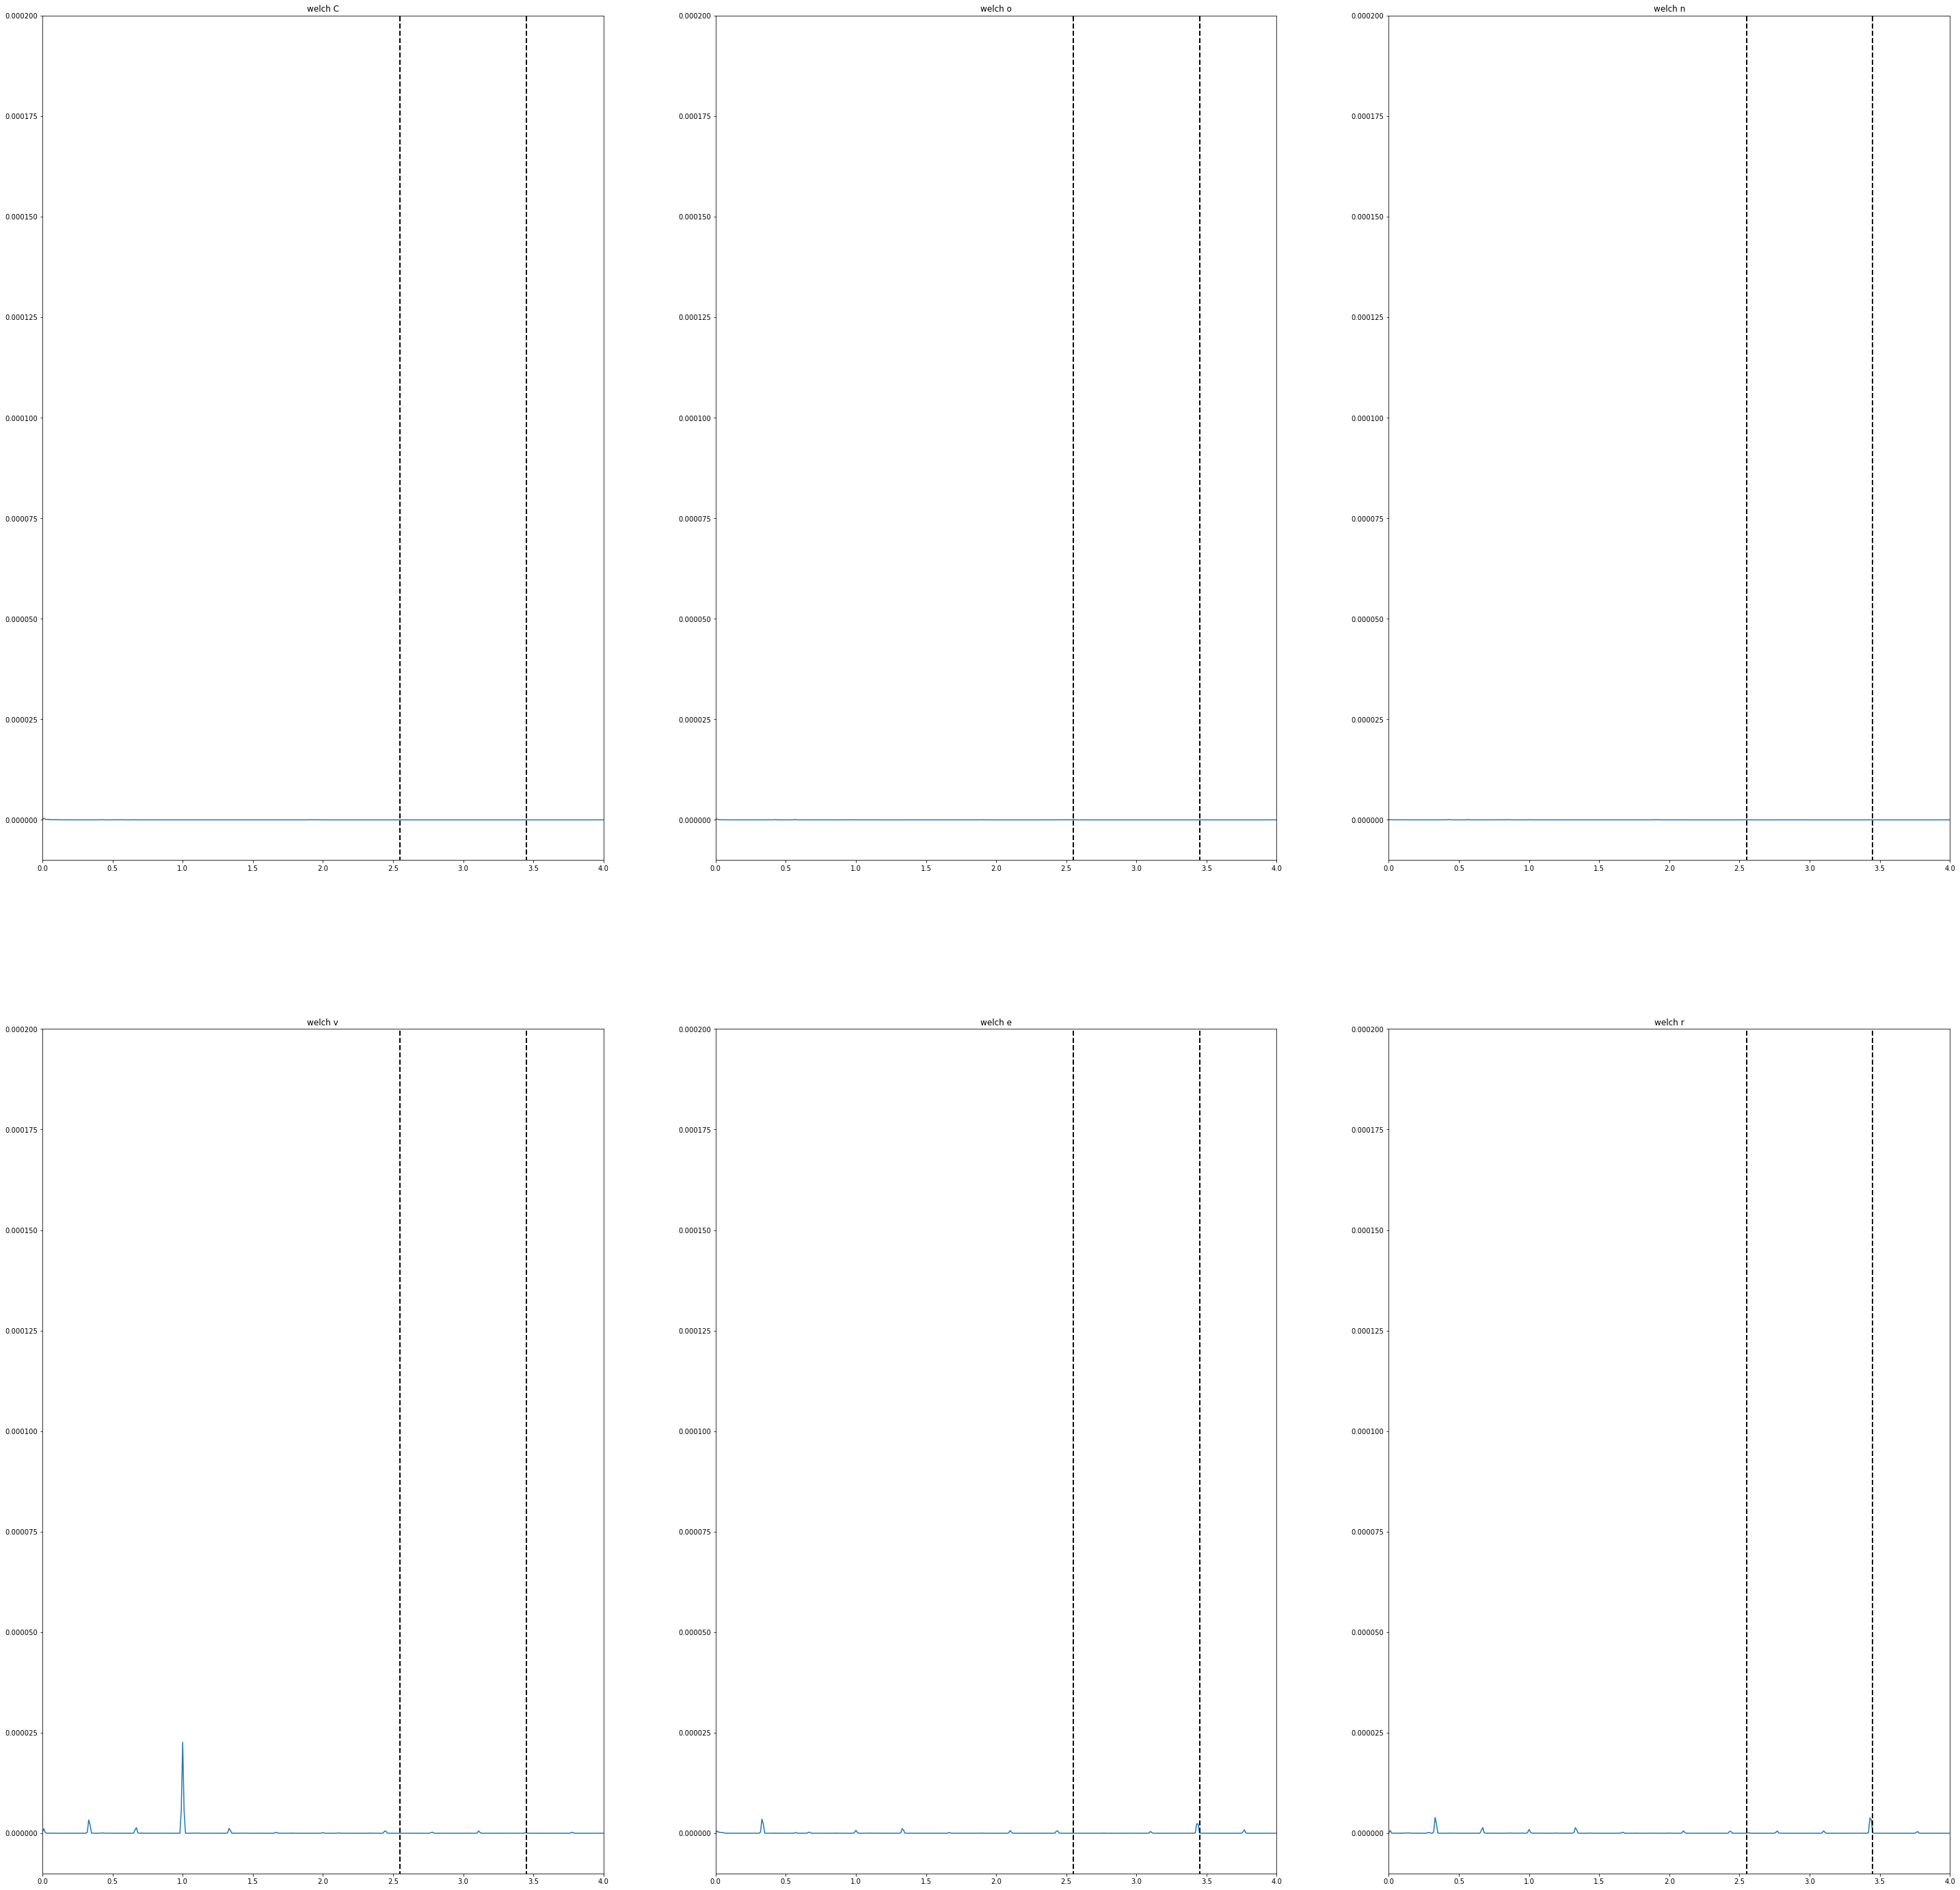

In [82]:
plt.figure(figsize = (50,50))
welch = []
for i in range(len(data)):
    plt.subplot(231+i)
    #frq, welch = scipy.signal.welch(data[i], fs = fs, nperseg=8000, nfft=80000)
    frq, welch_temp = scipy.signal.welch(data[i], fs = fs, nperseg=fs*100)
    welch.append(welch_temp)
    plt.title("welch " + file[i])
    plt.plot(frq, welch[i])    
    plt.plot([fo[i], fo[i]], [-1,1], 'k--', lw=2)
    plt.plot([fi[i], fi[i]], [-1,1], 'k--', lw=2)
    plt.xlim((0,4))
    plt.ylim((-0.00001, 0.0002))

plt.savefig('./images/welch_'+keyword, dpi = 300)

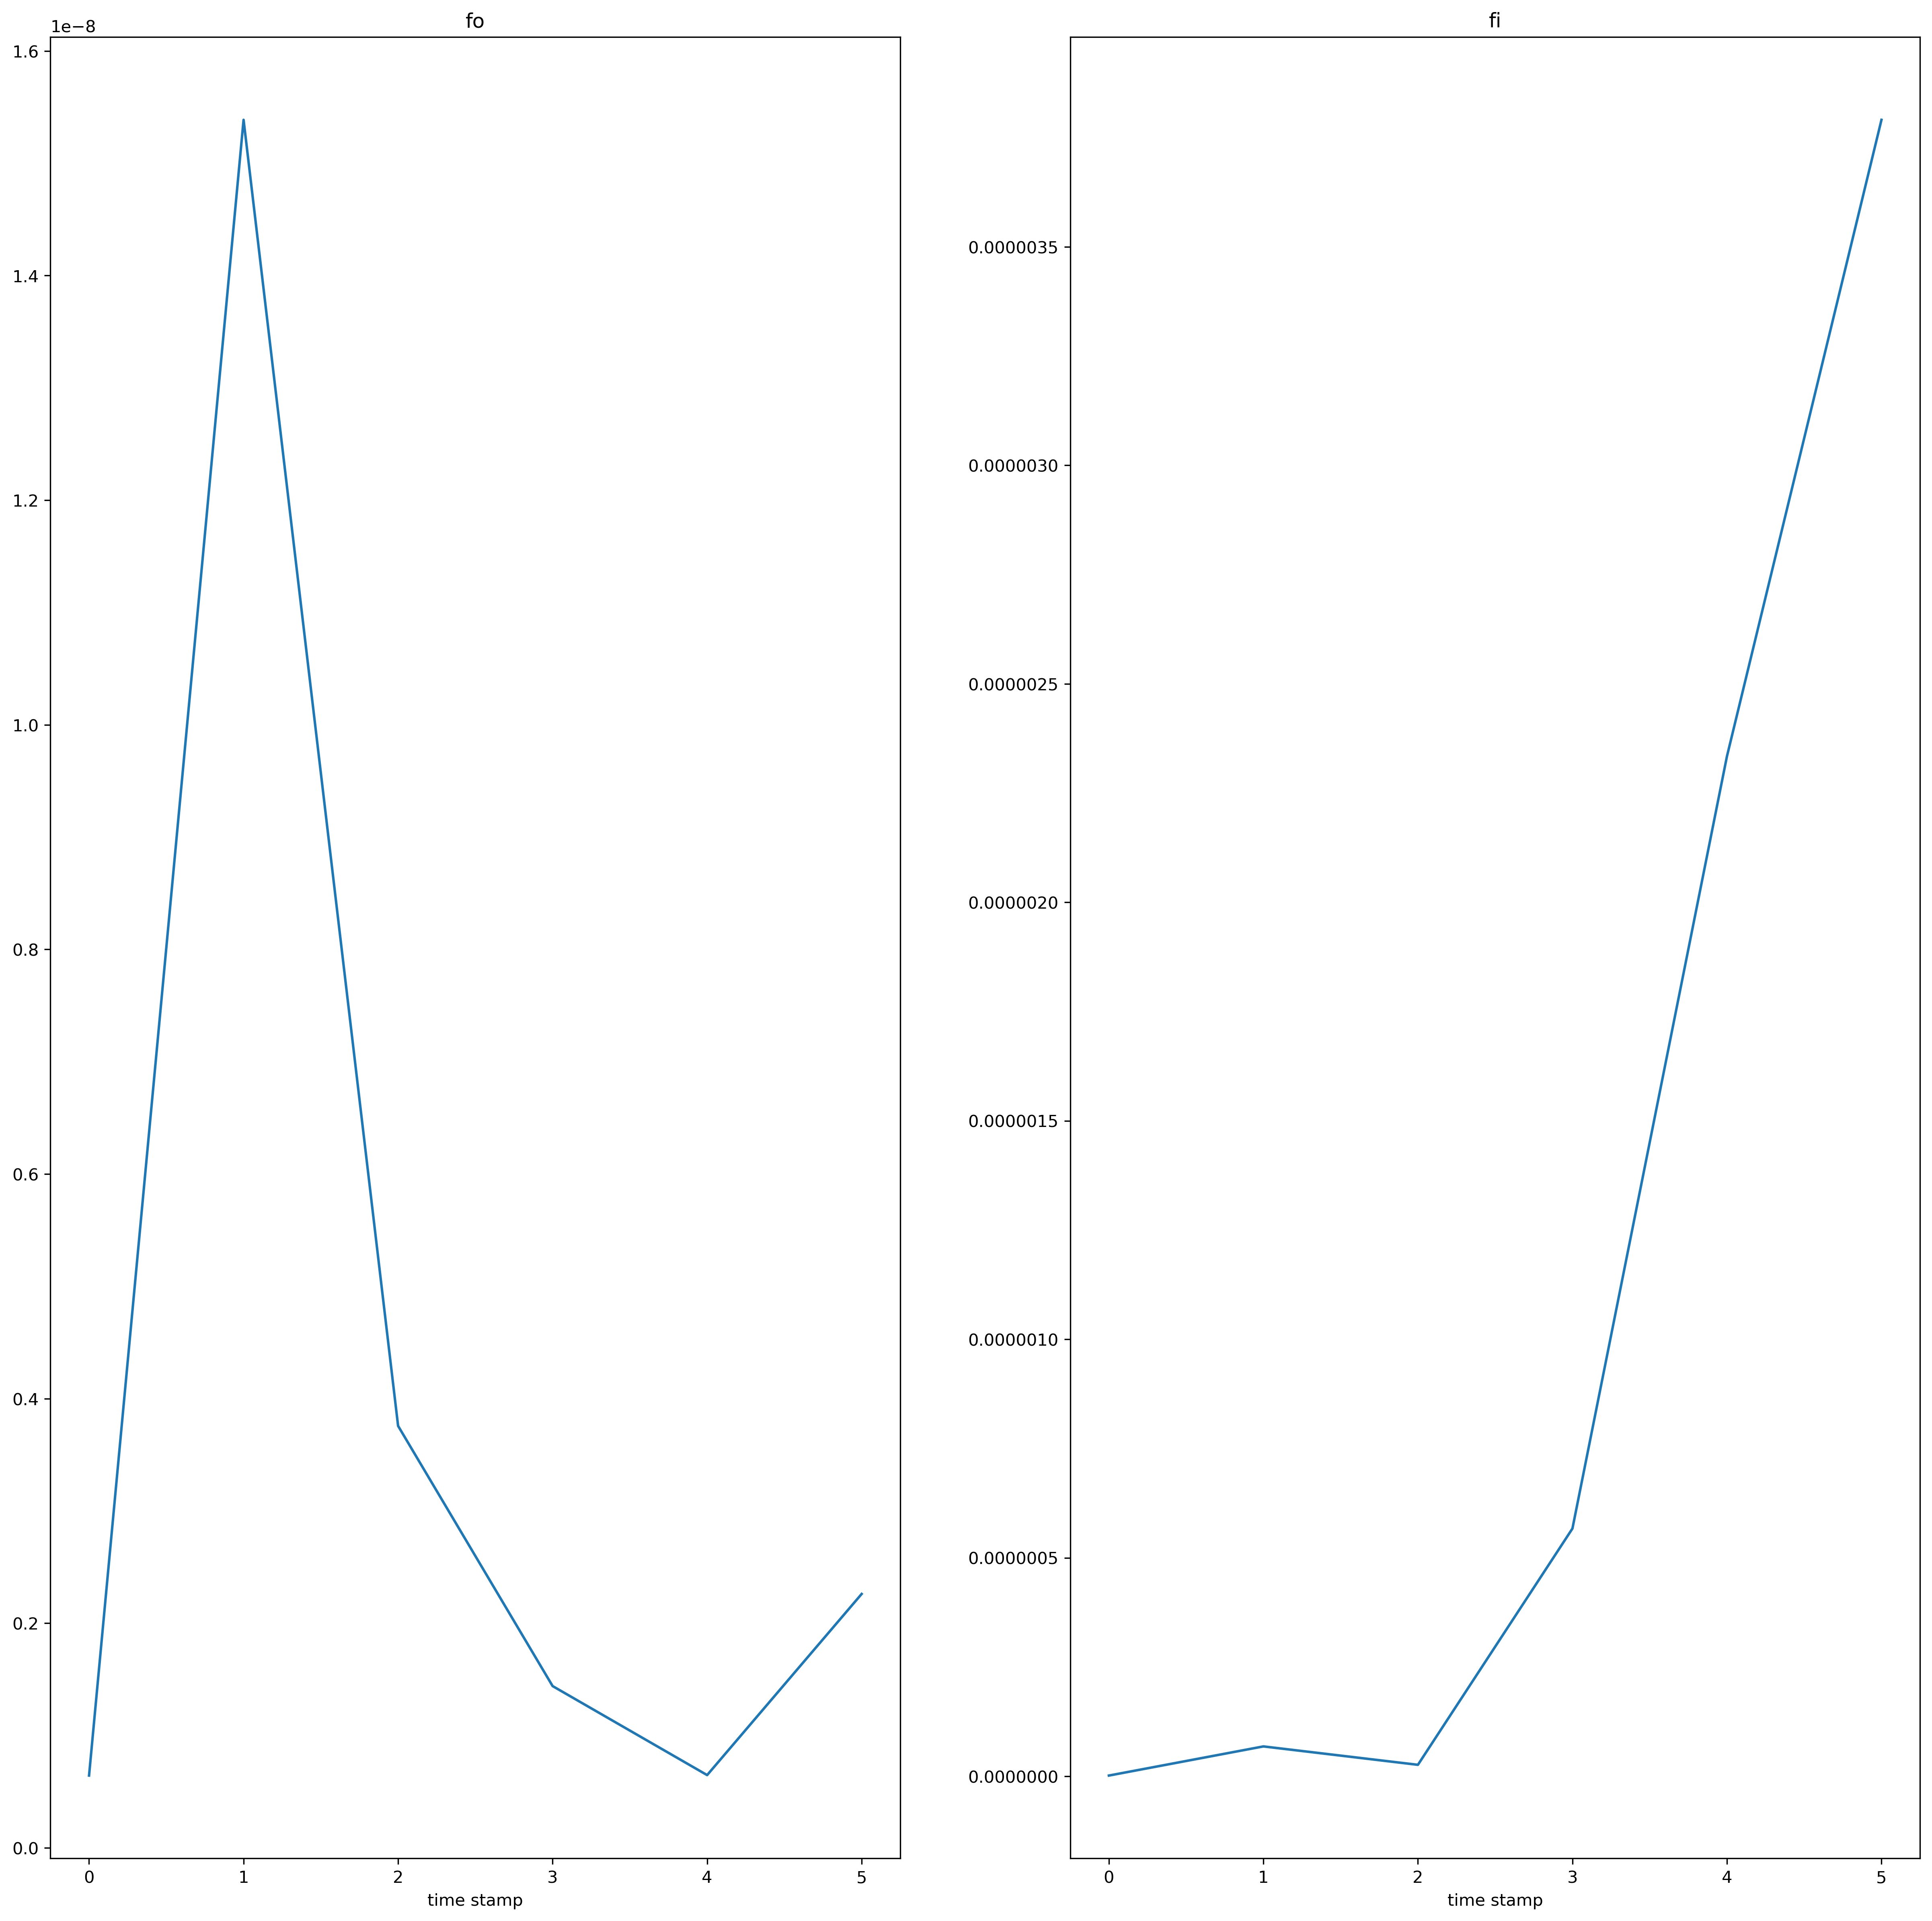

In [83]:
delta_frq = 0.05
pas_frq = frq[1]-frq[0]

debut_fo = int((fo[i] - delta_frq/2 * pas_frq)// pas_frq)
fin_fo = int((fo[i] + delta_frq/2 * pas_frq) // pas_frq) 

debut_fi = int((fi[i] - delta_frq/2 * pas_frq) // pas_frq) 
fin_fi = int((fi[i] + delta_frq/2 * pas_frq) // pas_frq) 

max_fo = []; max_fi = [];
for i in range(len(data)):
    max_fo.append(np.max(welch[i][debut_fo:fin_fo]))
    max_fi.append(np.max(welch[i][debut_fo:fin_fi]))

plt.figure(figsize=(20,20), dpi=300)
plt.subplot(121)
plt.plot(max_fo)
plt.title('fo')
plt.xlabel('time stamp')
plt.subplot(122)
plt.plot(max_fi)
plt.title('fi')
plt.xlabel('time stamp')

plt.savefig('./images/max_pwelch_fo_fi_'+keyword, dpi = 300)

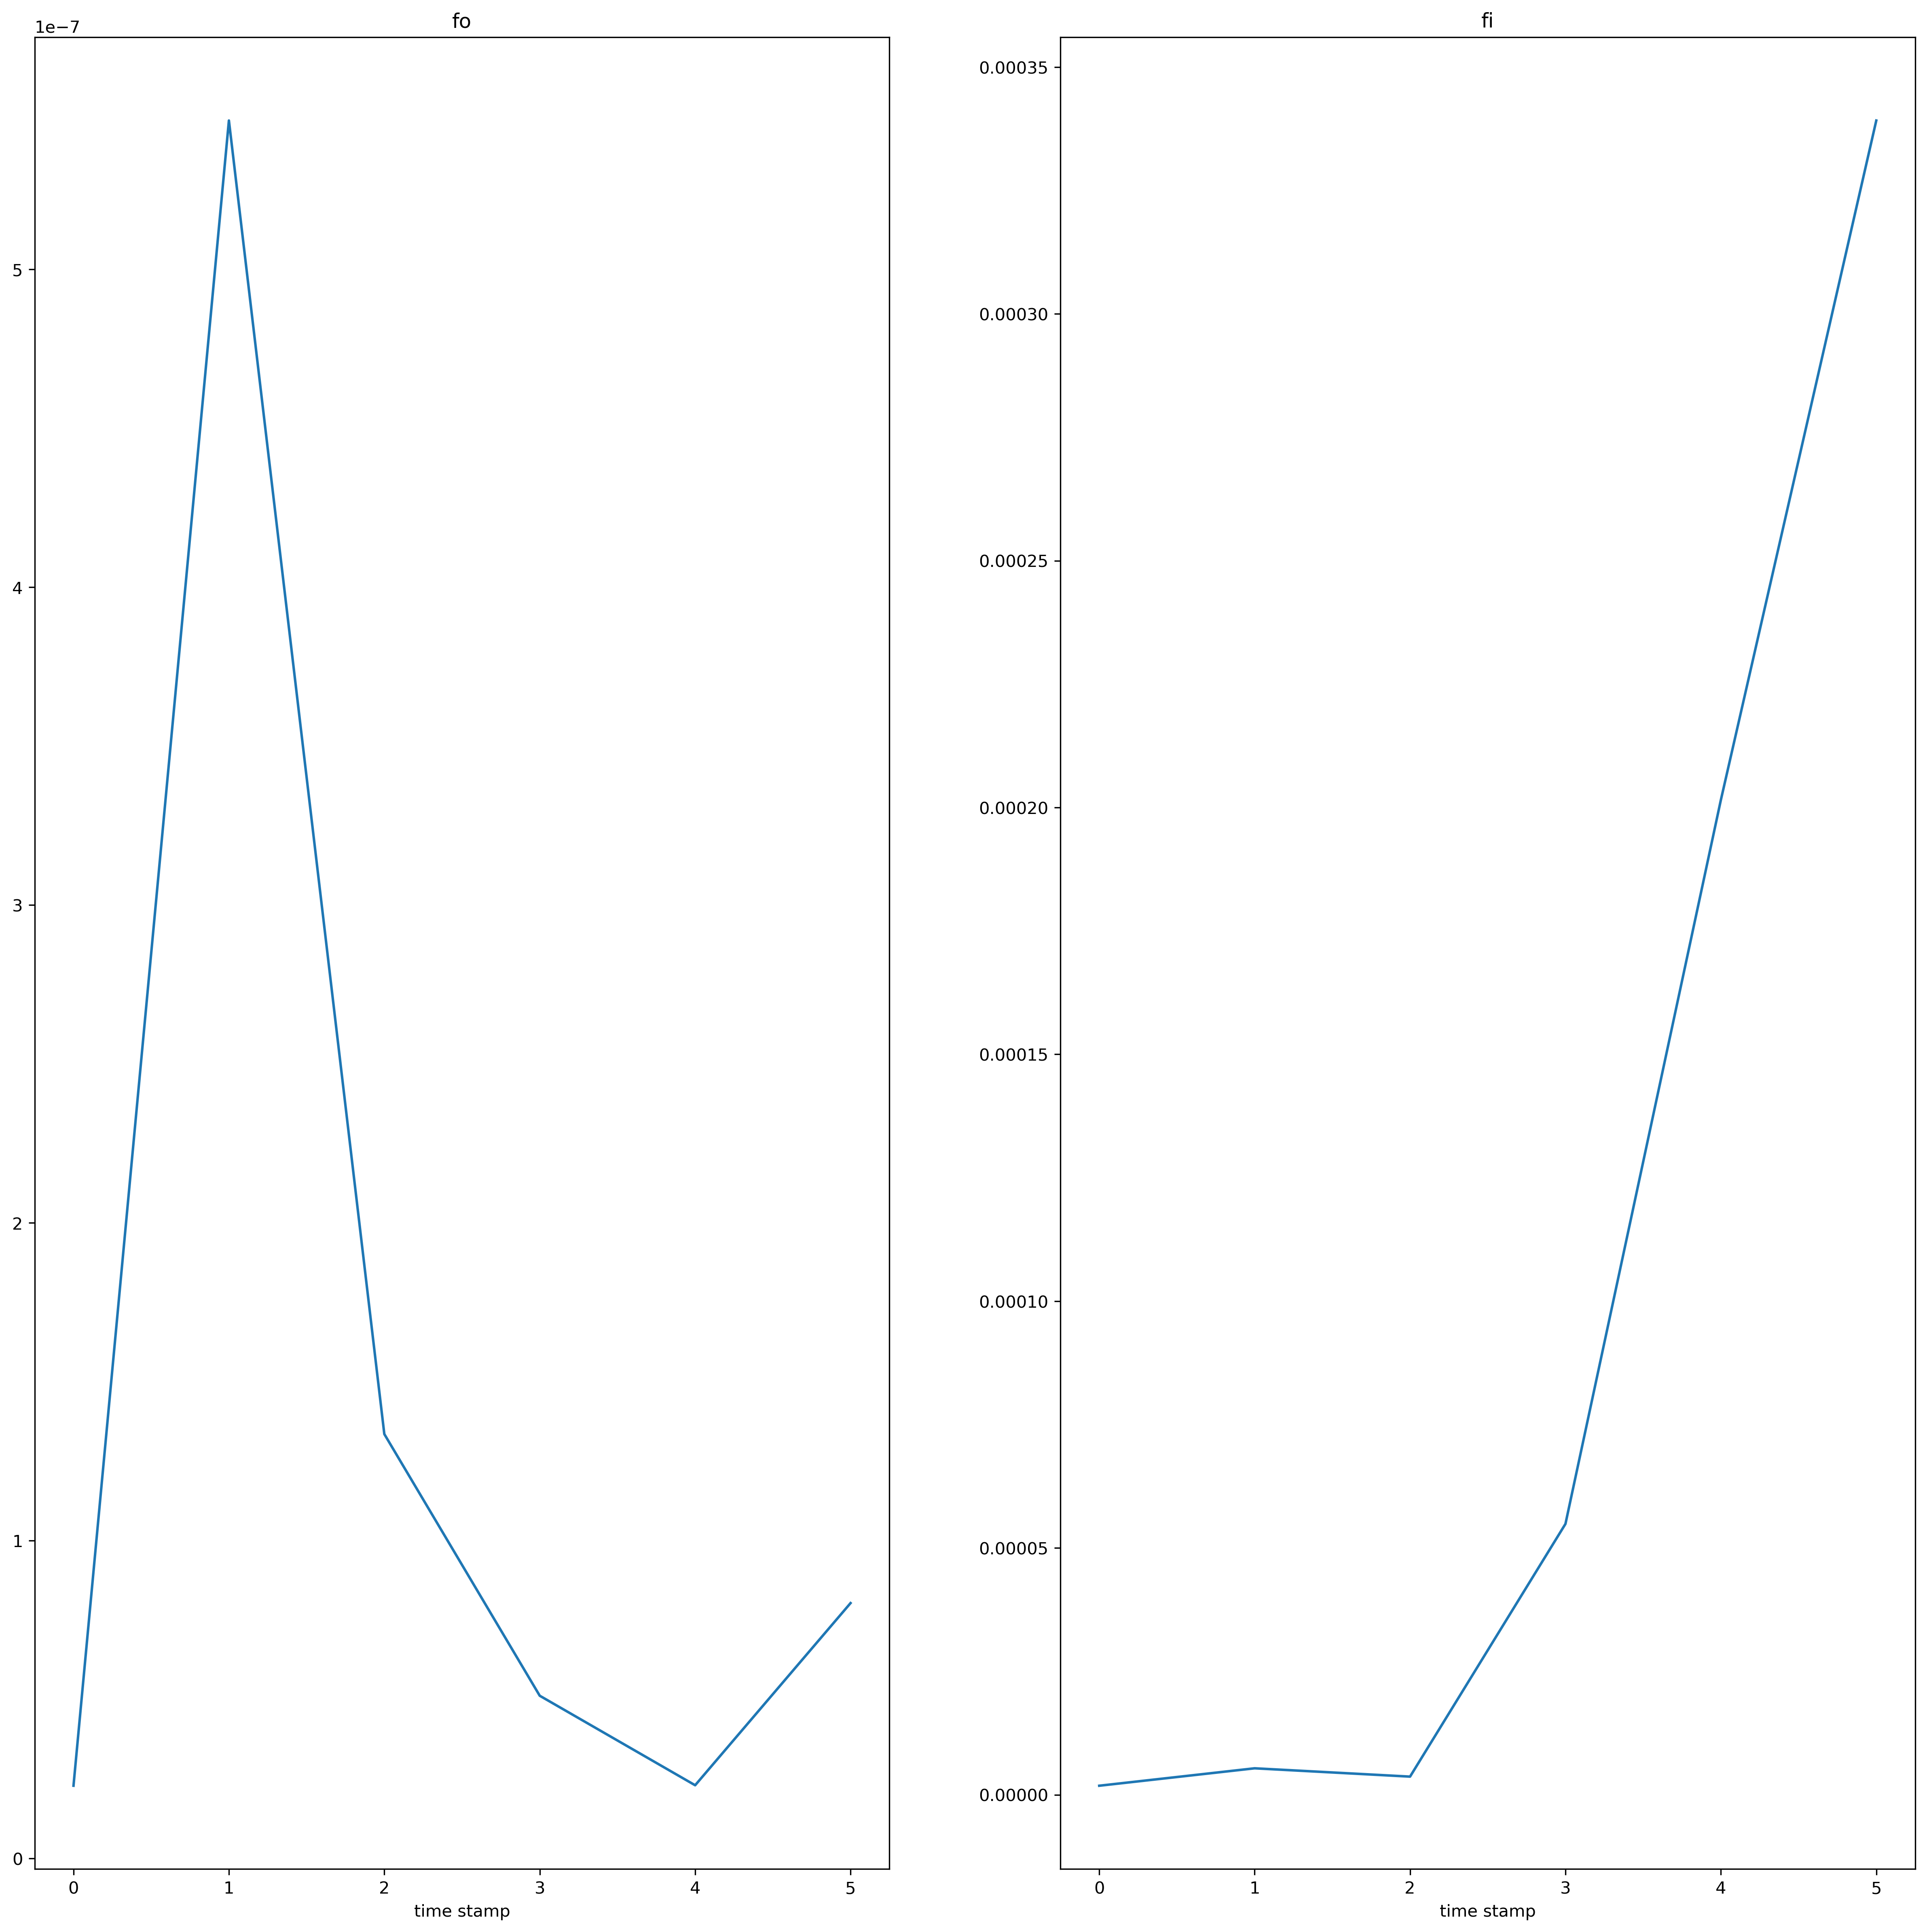

In [84]:
#It is normalized by the total energy  

delta_frq = 0.05
pas_frq = frq[1]-frq[0]

debut_fo = int((fo[i] - delta_frq/2 * pas_frq)// pas_frq)
fin_fo = int((fo[i] + delta_frq/2 * pas_frq) // pas_frq) 

debut_fi = int((fi[i] - delta_frq/2 * pas_frq) // pas_frq) 
fin_fi = int((fi[i] + delta_frq/2 * pas_frq) // pas_frq) 

sum_fo = []; sum_fi = []; sum_tot = [];
for i in range(len(data)):
    sum_fo.append(np.sum(welch[i][debut_fo:fin_fo]))
    sum_fi.append(np.sum(welch[i][debut_fo:fin_fi]))
    sum_tot.append(np.sum(welch[i]))


plt.figure(figsize=(20,20), dpi=300)
plt.subplot(121)
plt.plot(np.array(sum_fo)/np.mean(sum_tot[0:1]))
plt.title('fo')
plt.xlabel('time stamp')
plt.subplot(122)
plt.plot(np.array(sum_fi)/np.mean(sum_tot[0:1]))
plt.title('fi')
plt.xlabel('time stamp')

plt.savefig('./images/contrib_spectre_pwelch_fo_fi_'+keyword, dpi = 300)